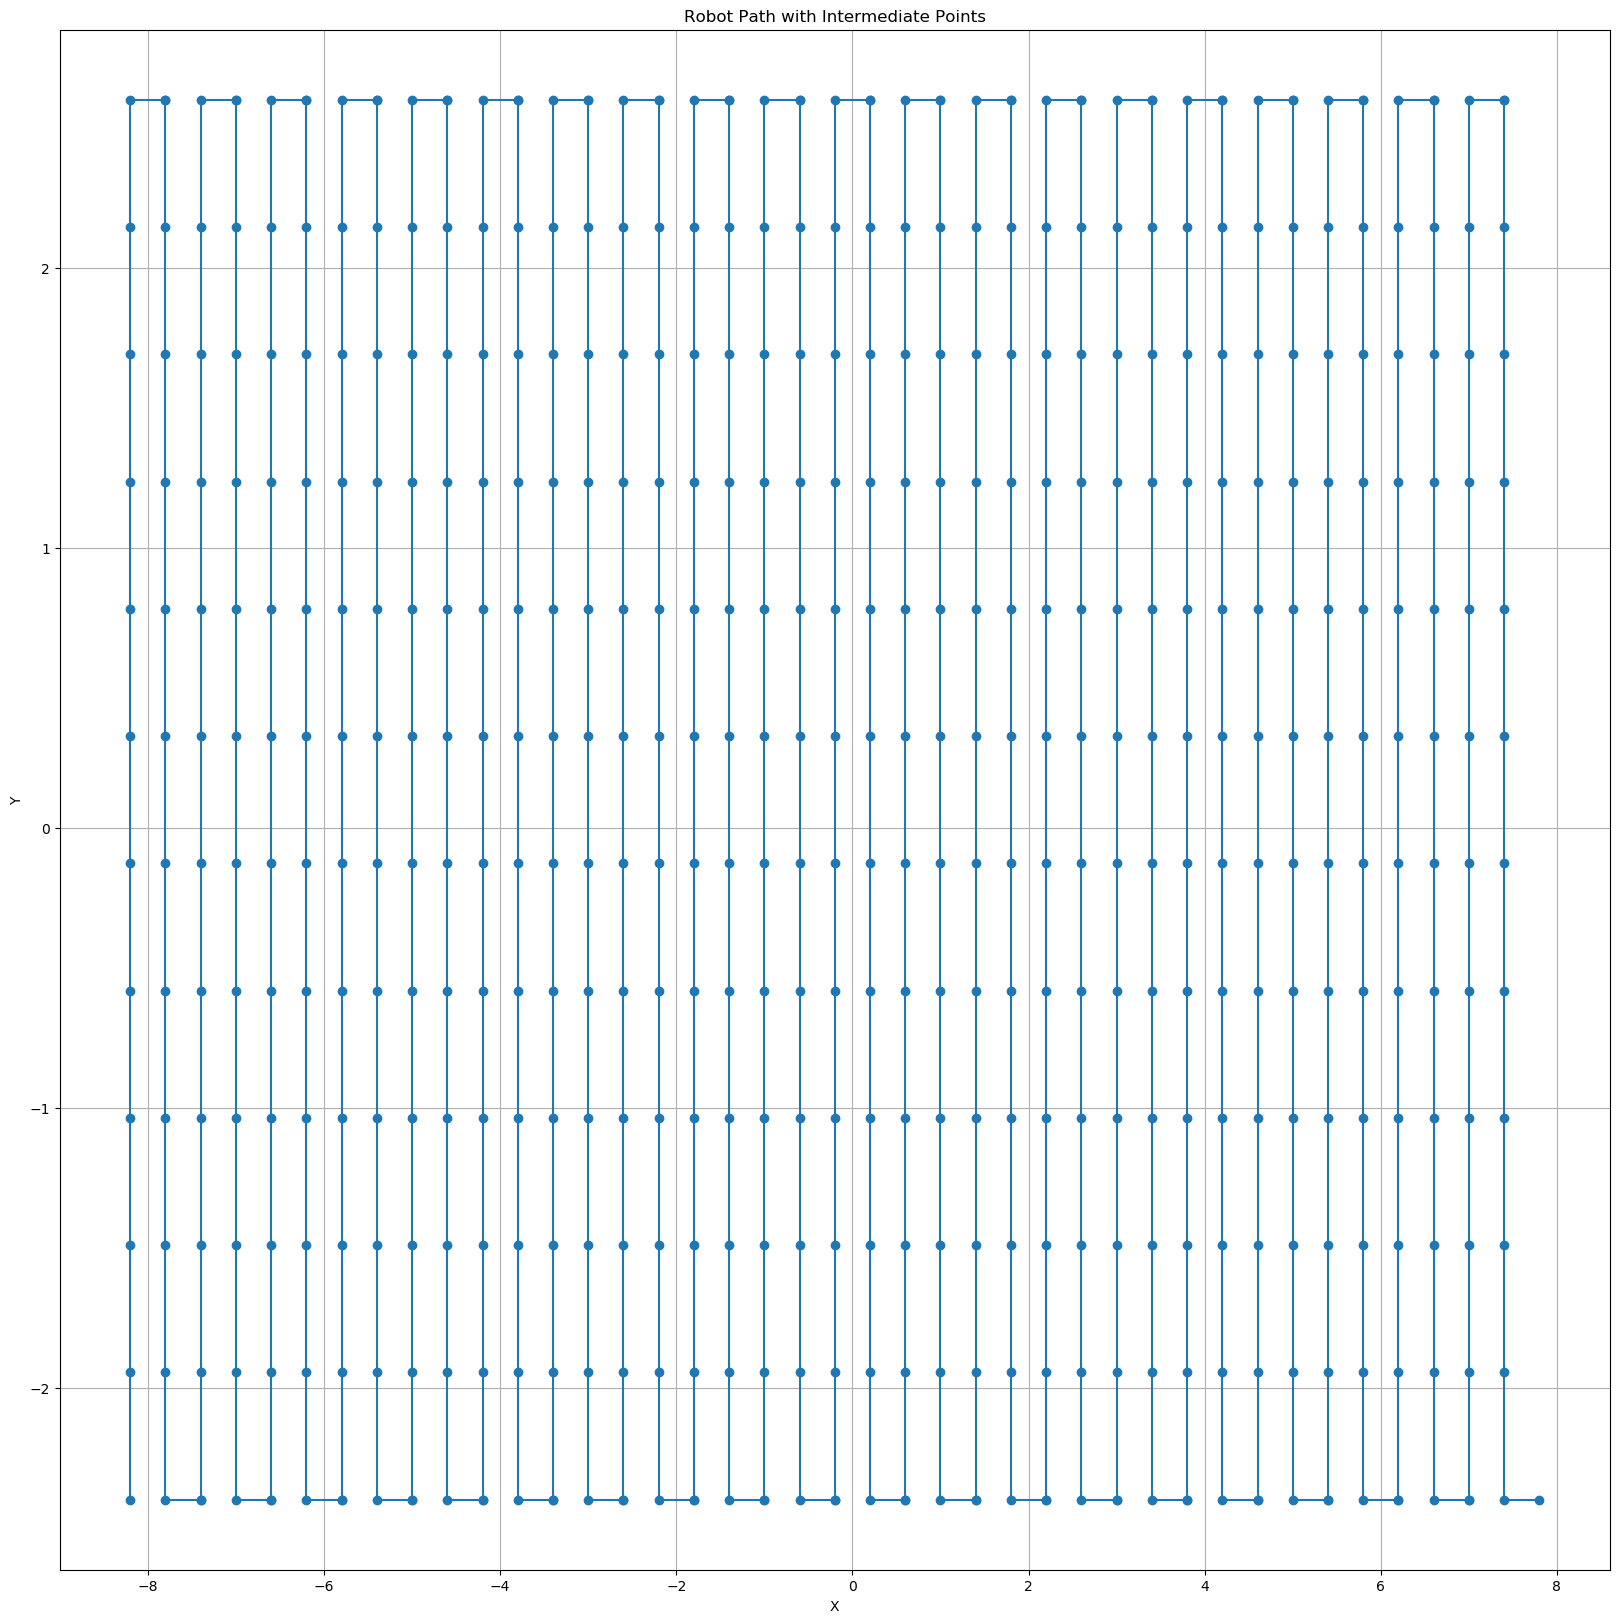

'path_points.txt'

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 定义区域大小
rows = 5
cols = 40

# 定义掉头间隔
turn_interval = 0.4

# 初始化路径点列表
path_points = []

# 插入点的数量
num_intermediate_points = 10

def generate_turn_points(rows, cols, turn_interval, num_intermediate_points, start_x_coord=0, start_y_coord=0):
    direction = 1  # 1 表示向上移动，-1 表示向下移动
    x = start_x_coord  # 初始化x坐标

    for i in range(cols):
        start_y = start_y_coord if direction == 1 else rows + start_y_coord
        end_y = rows + start_y_coord if direction == 1 else start_y_coord

        # 插入起始点
        path_points.append((start_y, x, 1.57 if direction == 1 else -1.57))

        # 插入中间点
        for j in range(1, num_intermediate_points + 1):
            fraction = j / (num_intermediate_points + 1)
            y = (1 - fraction) * start_y + fraction * end_y
            path_points.append((y, x, 1.57 if direction == 1 else -1.57))

        # 插入结束点
        path_points.append((end_y, x, 1.57 if direction == 1 else -1.57))

        # 插入掉头点（朝向右）
        x += turn_interval
        path_points.append((end_y, x, 0))

        # 改变方向
        direction *= -1

    return path_points

# 生成路径点
path_points = generate_turn_points(rows, cols, turn_interval, num_intermediate_points, start_x_coord=-8.2, start_y_coord=-2.4)

# 提取x和y坐标
x_coords = [x[1] for x in path_points]
y_coords = [x[0] for x in path_points]
yaw_coords = [x[2] for x in path_points]

# 保存路径点到文件
file_path = 'path_points.txt'
with open(file_path, 'w') as f:
    for i in range(len(x_coords)):
        f.write(f"{x_coords[i]:.2f} {y_coords[i]:.2f} {yaw_coords[i]:.2f}\n")

# 绘制路径
plt.figure(figsize=(20, 20))
plt.plot(x_coords, y_coords, marker='o')
plt.grid(True)
plt.title('Robot Path with Intermediate Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# 输出文件路径以便下载和检查
file_path
